# 13 Missing data
Required modules:
- pip install missingno
- pip install --extra-index-url https://pypi.fury.io/arrow-nightlies/ --prefer-binary --pre pyarrow
  - Because pyarrow is  required for quilt, but do not work in python later than 3.10 
- pip install quilt

and then run
- quilt install ResidentialMario/missingno_data

In [1]:
import pandas as pd
file = "../data/nyc_yellow_taxi_trip_selection.csv" # Takes about xx seconds...
#file = "../data/nyc_yellow_taxi_trip_records_from_Jan_to_Aug_2023.csv" # Huge takes almost 3 minutes to load
df = pd.read_csv(file, parse_dates=["tpep_pickup_datetime", "tpep_dropoff_datetime"] )
#df = pd.read_csv(file, usecols=["VendorID","tpep_pickup_datetime","tpep_dropoff_datetime","passenger_count","trip_distance","RatecodeID","PULocationID","DOLocationID","tip_amount","total_amount"], parse_dates=["tpep_pickup_datetime", "tpep_dropoff_datetime"] )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0.1           1000000 non-null  int64         
 1   Unnamed: 0             1000000 non-null  int64         
 2   VendorID               1000000 non-null  int64         
 3   tpep_pickup_datetime   1000000 non-null  datetime64[ns]
 4   tpep_dropoff_datetime  1000000 non-null  datetime64[ns]
 5   passenger_count        972959 non-null   float64       
 6   trip_distance          1000000 non-null  float64       
 7   RatecodeID             972959 non-null   float64       
 8   store_and_fwd_flag     972959 non-null   object        
 9   PULocationID           1000000 non-null  int64         
 10  DOLocationID           1000000 non-null  int64         
 11  payment_type           1000000 non-null  int64         
 12  fare_amount            100000

<AxesSubplot: >

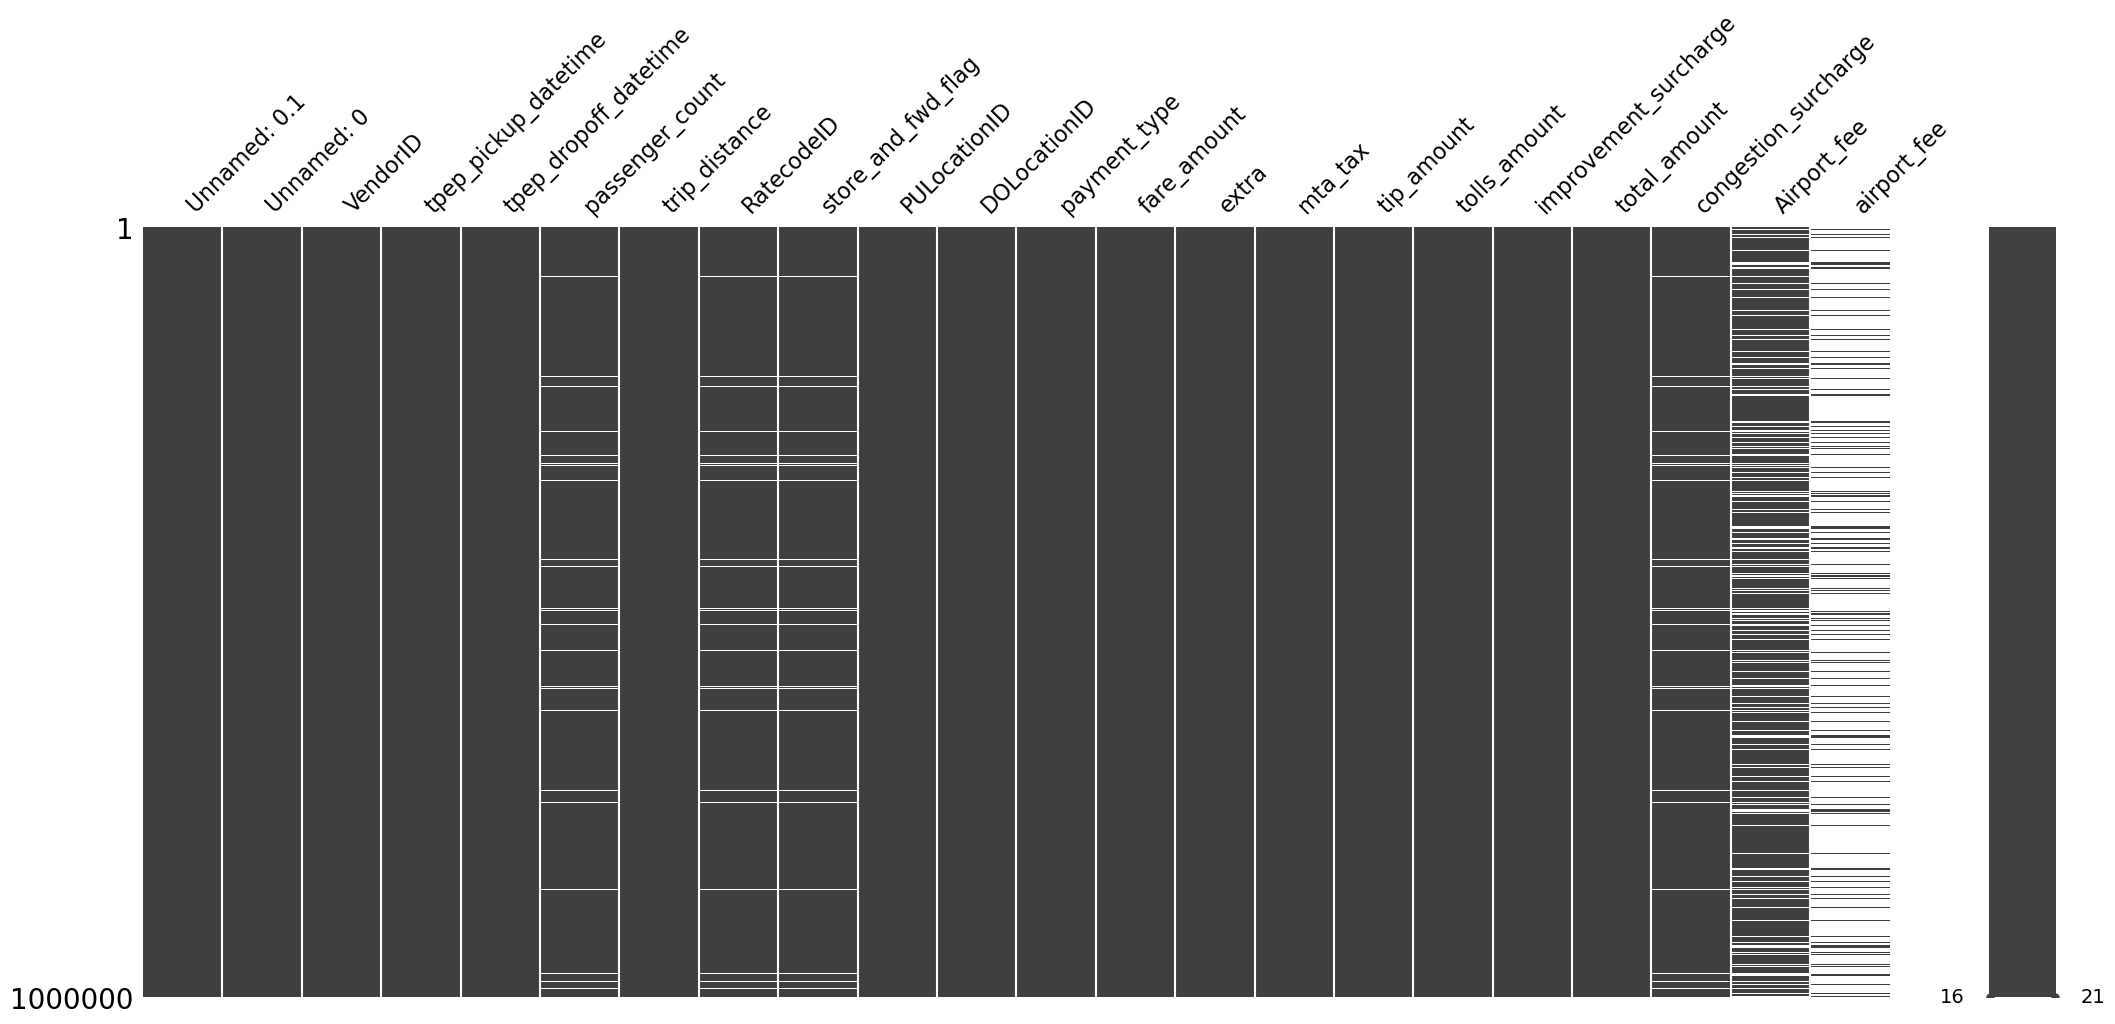

In [2]:
import missingno as msno
#selection=random_selection_fixed =df.sample(1000, random_state=42)
df.info()
msno.matrix(df)

<AxesSubplot: >

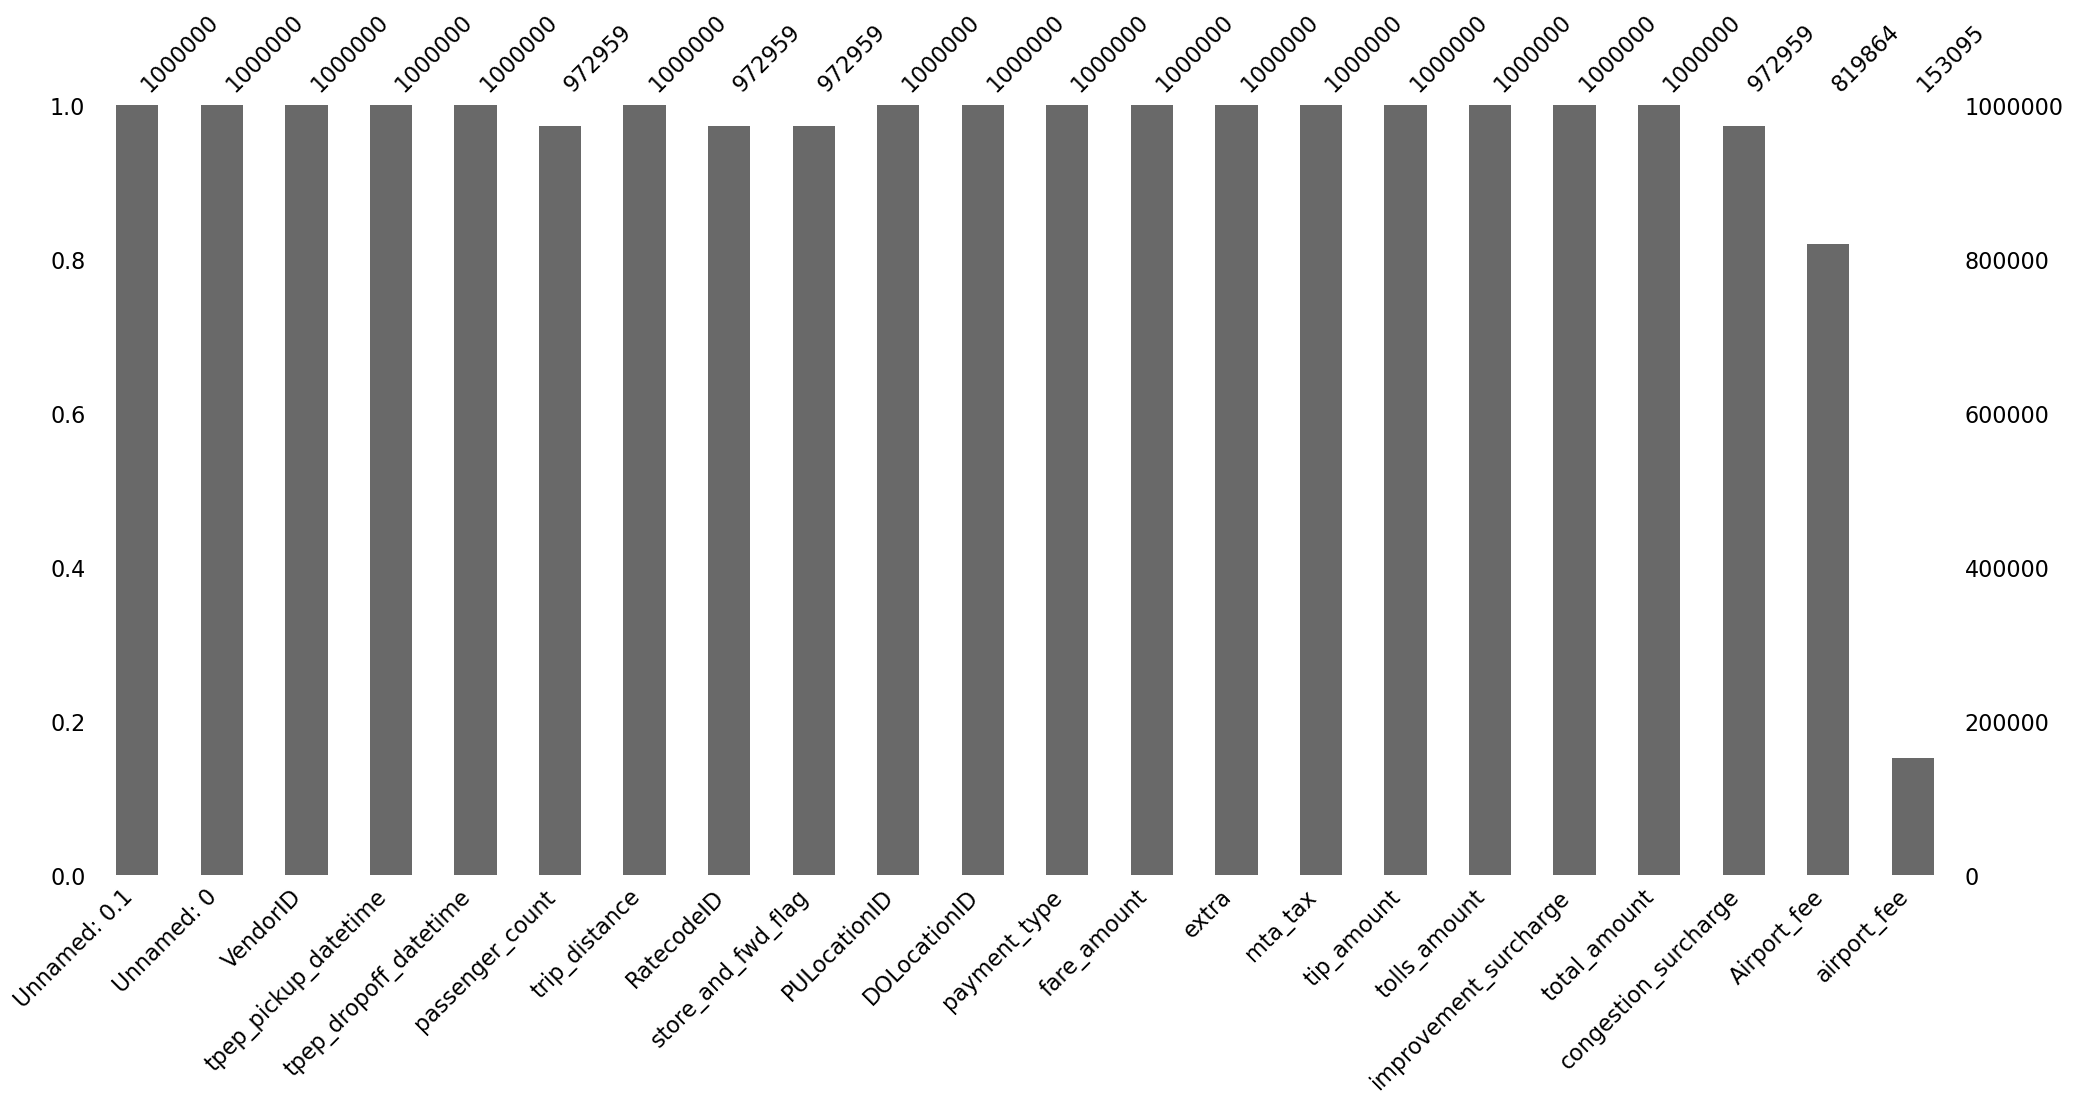

In [3]:
msno.bar(df)

In [4]:
df.head(20)

,Unnamed: 0.1,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee
0,3560310,3560310,2,2023-05-29 15:40:01,2023-05-29 15:51:15,1.0,1.97,1.0,N,237,...,13.5,0.0,0.5,3.50,0.00,1.0,21.00,2.5,0.0,NaN
1,16972558,16972558,1,2023-01-26 16:55:19,2023-01-26 17:01:28,2.0,0.30,1.0,N,114,...,6.5,5.0,0.5,2.00,0.00,1.0,15.00,2.5,NaN,0.00
2,8617974,8617974,1,2023-04-14 23:14:24,2023-04-14 23:29:10,2.0,1.70,1.0,N,162,...,12.1,3.5,0.5,2.50,0.00,1.0,19.60,2.5,0.0,NaN
3,17332136,17332136,2,2023-01-23 07:47:19,2023-01-23 08:10:05,1.0,8.31,1.0,N,132,...,34.5,0.0,0.5,7.45,0.00,1.0,44.70,0.0,NaN,1.25
4,14128052,14128052,1,2023-02-23 08:49:52,2023-02-23 08:59:24,1.0,0.90,1.0,N,186,...,10.0,2.5,0.5,0.00,0.00,1.0,14.00,2.5,0.0,NaN
5,3940794,3940794,1,2023-05-25 14:54:32,2023-05-25 15:03:12,1.0,1.50,1.0,N,232,...,10.7,2.5,0.5,2.90,0.00,1.0,17.60,2.5,0.0,NaN
6,15051438,15051438,2,2023-02-14 10:05:11,2023-02-14 10:11:08,1.0,0.94,1.0,N,186,...,7.9,0.0,0.5,2.38,0.00,1.0,14.28,2.5,0.0,NaN
7,524546,524546,2,2023-06-25 21:59:53,2023-06-25 22:06:22,1.0,1.14,1.0,N,79,...,8.6,1.0,0.5,0.00,0.00,1.0,13.60,2.5,0.0,NaN
8,15972233,15972233,2,2023-02-05 09:35:24,2023-02-05 09:45:39,1.0,2.25,1.0,N,249,...,13.5,0.0,0.5,3.50,0.00,1.0,21.00,2.5,0.0,NaN
9,6337327,6337327,2,2023-05-05 09:51:30,2023-05-05 09:59:48,1.0,1.17,1.0,N,230,...,9.3,0.0,0.5,2.70,0.00,1.0,16.00,2.5,0.0,NaN


In [5]:
# Lets use a real type for the NaN values
import numpy as np
df = df.replace("NaN", np.nan)
df.head(20)

,Unnamed: 0.1,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee
0,3560310,3560310,2,2023-05-29 15:40:01,2023-05-29 15:51:15,1.0,1.97,1.0,N,237,...,13.5,0.0,0.5,3.50,0.00,1.0,21.00,2.5,0.0,NaN
1,16972558,16972558,1,2023-01-26 16:55:19,2023-01-26 17:01:28,2.0,0.30,1.0,N,114,...,6.5,5.0,0.5,2.00,0.00,1.0,15.00,2.5,NaN,0.00
2,8617974,8617974,1,2023-04-14 23:14:24,2023-04-14 23:29:10,2.0,1.70,1.0,N,162,...,12.1,3.5,0.5,2.50,0.00,1.0,19.60,2.5,0.0,NaN
3,17332136,17332136,2,2023-01-23 07:47:19,2023-01-23 08:10:05,1.0,8.31,1.0,N,132,...,34.5,0.0,0.5,7.45,0.00,1.0,44.70,0.0,NaN,1.25
4,14128052,14128052,1,2023-02-23 08:49:52,2023-02-23 08:59:24,1.0,0.90,1.0,N,186,...,10.0,2.5,0.5,0.00,0.00,1.0,14.00,2.5,0.0,NaN
5,3940794,3940794,1,2023-05-25 14:54:32,2023-05-25 15:03:12,1.0,1.50,1.0,N,232,...,10.7,2.5,0.5,2.90,0.00,1.0,17.60,2.5,0.0,NaN
6,15051438,15051438,2,2023-02-14 10:05:11,2023-02-14 10:11:08,1.0,0.94,1.0,N,186,...,7.9,0.0,0.5,2.38,0.00,1.0,14.28,2.5,0.0,NaN
7,524546,524546,2,2023-06-25 21:59:53,2023-06-25 22:06:22,1.0,1.14,1.0,N,79,...,8.6,1.0,0.5,0.00,0.00,1.0,13.60,2.5,0.0,NaN
8,15972233,15972233,2,2023-02-05 09:35:24,2023-02-05 09:45:39,1.0,2.25,1.0,N,249,...,13.5,0.0,0.5,3.50,0.00,1.0,21.00,2.5,0.0,NaN
9,6337327,6337327,2,2023-05-05 09:51:30,2023-05-05 09:59:48,1.0,1.17,1.0,N,230,...,9.3,0.0,0.5,2.70,0.00,1.0,16.00,2.5,0.0,NaN


<AxesSubplot: >

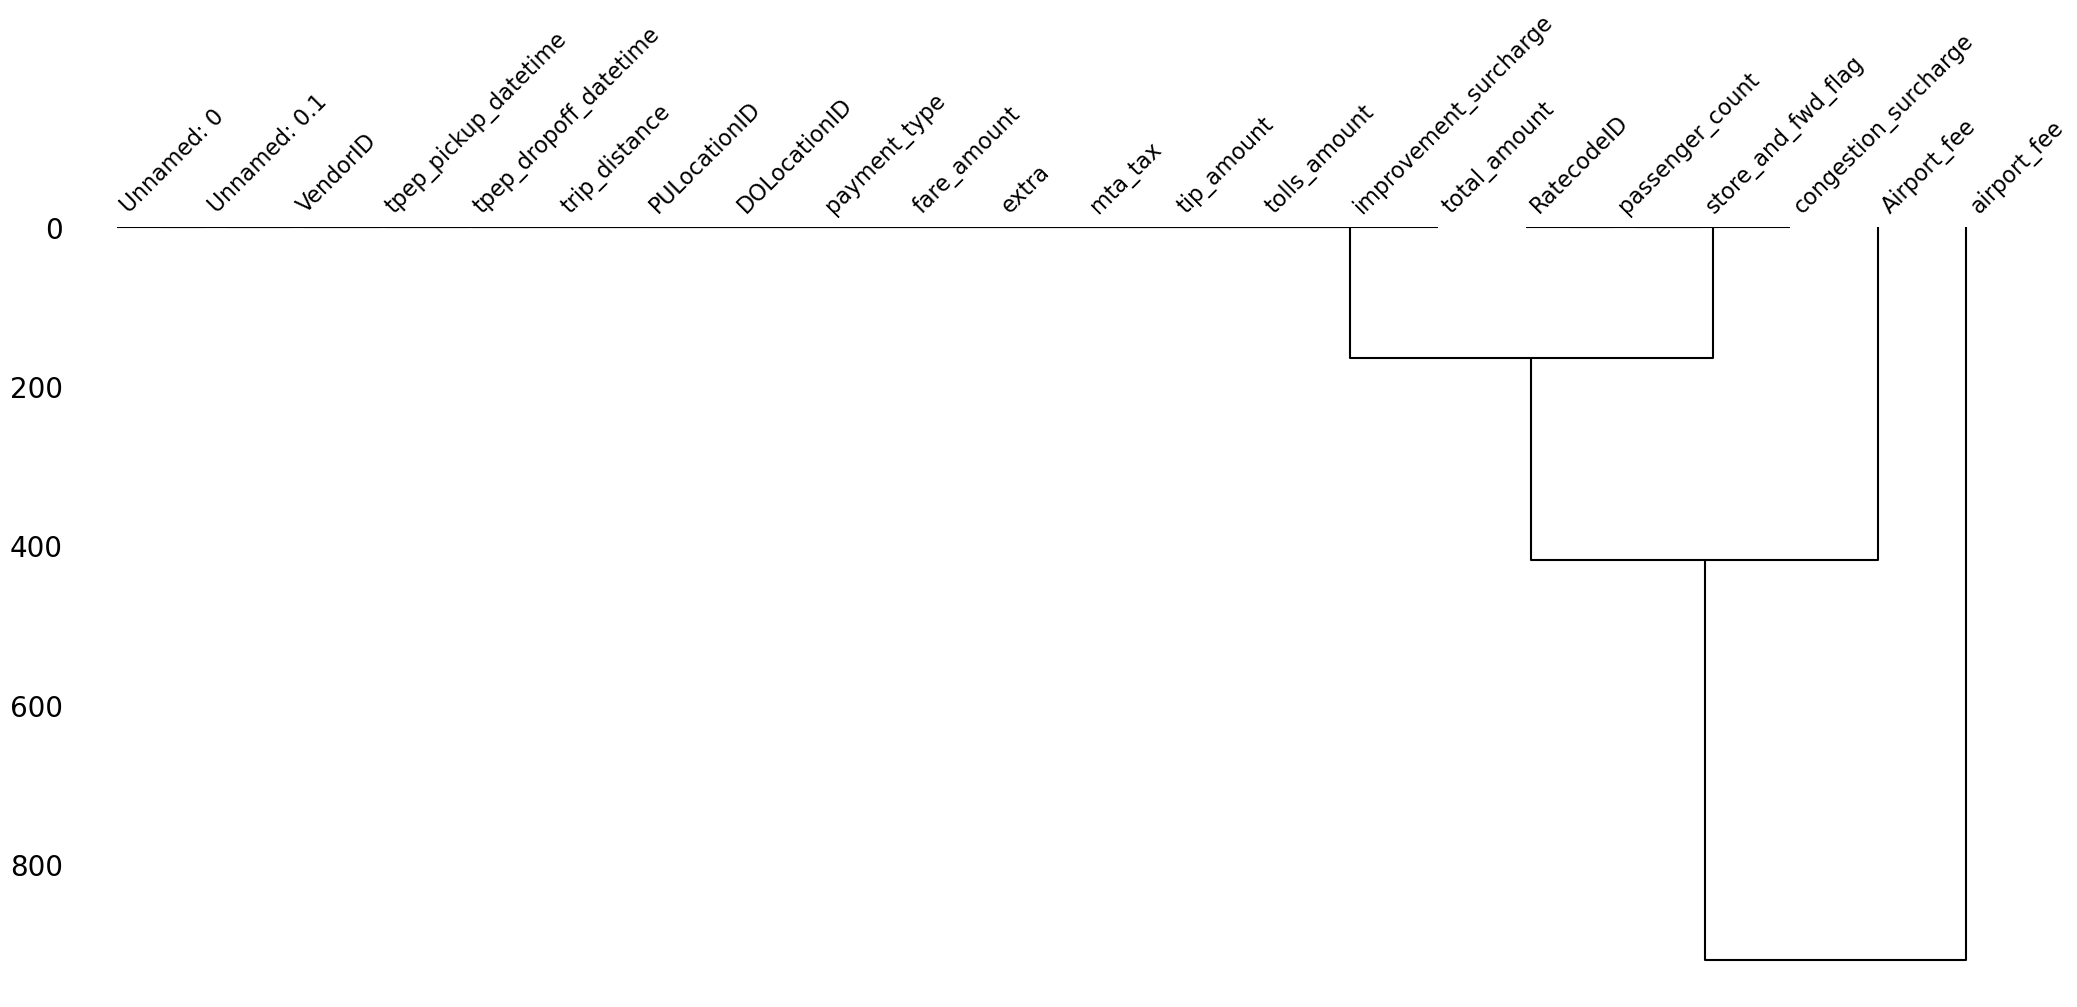

In [6]:
msno.dendrogram(df)

In [7]:
df.isnull().sum()

Unnamed: 0.1                  0
Unnamed: 0                    0
VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count           27041
trip_distance                 0
RatecodeID                27041
store_and_fwd_flag        27041
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge      27041
Airport_fee              180136
airport_fee              846905
dtype: int64

In [8]:
df["passenger_count_corrected"] = df["passenger_count"] 
df["passenger_count_corrected"].fillna(df["passenger_count"].median(), inplace=True)

In [9]:
df.head(20)

,Unnamed: 0.1,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee,passenger_count_corrected
0,3560310,3560310,2,2023-05-29 15:40:01,2023-05-29 15:51:15,1.0,1.97,1.0,N,237,...,0.0,0.5,3.50,0.00,1.0,21.00,2.5,0.0,NaN,1.0
1,16972558,16972558,1,2023-01-26 16:55:19,2023-01-26 17:01:28,2.0,0.30,1.0,N,114,...,5.0,0.5,2.00,0.00,1.0,15.00,2.5,NaN,0.00,2.0
2,8617974,8617974,1,2023-04-14 23:14:24,2023-04-14 23:29:10,2.0,1.70,1.0,N,162,...,3.5,0.5,2.50,0.00,1.0,19.60,2.5,0.0,NaN,2.0
3,17332136,17332136,2,2023-01-23 07:47:19,2023-01-23 08:10:05,1.0,8.31,1.0,N,132,...,0.0,0.5,7.45,0.00,1.0,44.70,0.0,NaN,1.25,1.0
4,14128052,14128052,1,2023-02-23 08:49:52,2023-02-23 08:59:24,1.0,0.90,1.0,N,186,...,2.5,0.5,0.00,0.00,1.0,14.00,2.5,0.0,NaN,1.0
5,3940794,3940794,1,2023-05-25 14:54:32,2023-05-25 15:03:12,1.0,1.50,1.0,N,232,...,2.5,0.5,2.90,0.00,1.0,17.60,2.5,0.0,NaN,1.0
6,15051438,15051438,2,2023-02-14 10:05:11,2023-02-14 10:11:08,1.0,0.94,1.0,N,186,...,0.0,0.5,2.38,0.00,1.0,14.28,2.5,0.0,NaN,1.0
7,524546,524546,2,2023-06-25 21:59:53,2023-06-25 22:06:22,1.0,1.14,1.0,N,79,...,1.0,0.5,0.00,0.00,1.0,13.60,2.5,0.0,NaN,1.0
8,15972233,15972233,2,2023-02-05 09:35:24,2023-02-05 09:45:39,1.0,2.25,1.0,N,249,...,0.0,0.5,3.50,0.00,1.0,21.00,2.5,0.0,NaN,1.0
9,6337327,6337327,2,2023-05-05 09:51:30,2023-05-05 09:59:48,1.0,1.17,1.0,N,230,...,0.0,0.5,2.70,0.00,1.0,16.00,2.5,0.0,NaN,1.0


In [10]:
df.isnull().sum()

Unnamed: 0.1                      0
Unnamed: 0                        0
VendorID                          0
tpep_pickup_datetime              0
tpep_dropoff_datetime             0
passenger_count               27041
trip_distance                     0
RatecodeID                    27041
store_and_fwd_flag            27041
PULocationID                      0
DOLocationID                      0
payment_type                      0
fare_amount                       0
extra                             0
mta_tax                           0
tip_amount                        0
tolls_amount                      0
improvement_surcharge             0
total_amount                      0
congestion_surcharge          27041
Airport_fee                  180136
airport_fee                  846905
passenger_count_corrected         0
dtype: int64